<a href="https://colab.research.google.com/github/pongsapaks/Data-science/blob/main/Book_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data, Normalization and EDA

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn.over_sampling
import scipy.stats

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv('https://raw.githubusercontent.com/pongsapaks/Data-science/main/log2.csv')  

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Action'], axis=1)
y = df['Action']

In [2]:
#data with no EDA
X_trainBasic, X_testBasic, y_trainBasic, y_testBasic = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=42)

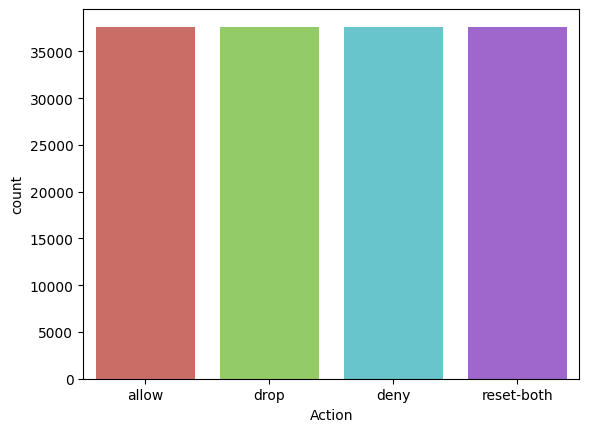

In [3]:
# Apply SMOTE (regular, svm)
sm = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = sm.fit_resample(X, y)

pca = PCA(n_components=4)
X_res_vis = pca.fit_transform(X_resampled)
sns.countplot(x=y_resampled,data=df,palette='hls')
plt.show()

In [4]:
#Check Shapiro test (Normal distribution)
scipy.stats.shapiro(X_resampled)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.000840306282043457, pvalue=0.0)

In [5]:
#Normalization
x_normal= (X_resampled - np.min(X_resampled)) / (np.max(X_resampled) / np.min(X_resampled)).values
x_normal

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0               0.0               0.0              0.0                   0.0   
1               0.0               0.0              0.0                   0.0   
2               0.0               0.0              0.0                   0.0   
3               0.0               0.0              0.0                   0.0   
4               0.0               0.0              0.0                   0.0   
...             ...               ...              ...                   ...   
150555          0.0               0.0              0.0                   0.0   
150556          0.0               0.0              0.0                   0.0   
150557          0.0               0.0              0.0                   0.0   
150558          0.0               0.0              0.0                   0.0   
150559          0.0               0.0              0.0                   0.0   

               Bytes    Bytes Sent  Bytes Received       Packets  \
0       5.530350e-06  2.150816e-06             0.0  9.651429e-07   
1       2.225375e-04  9.741931e-05             0.0  1.737257e-05   
2       8.413695e-06  3.669039e-06             0.0  9.651429e-07   
3       1.544244e-04  8.717131e-05             0.0  1.351200e-05   
4       1.195785e-03  4.249759e-04             0.0  2.895429e-05   
...              ...           ...             ...           ...   
150555  9.453590e-08  1.265186e-07             0.0  0.000000e+00   
150556  9.453590e-08  1.265186e-07             0.0  0.000000e+00   
150557  9.453590e-08  1.265186e-07             0.0  0.000000e+00   
150558  1.101343e-05  1.031127e-05             0.0  2.895429e-06   
150559  9.453590e-08  1.265186e-07             0.0  0.000000e+00   

        Elapsed Time (sec)  pkts_sent  pkts_received  
0                      0.0   0.000000            0.0  
1                      0.0   0.000012            0.0  
2                      0.0   0.000000            0.0  
3                      0.0   0.000009            0.0  
4                      0.0   0.000016            0.0  
...                    ...        ...            ...  
150555                 0.0   0.000000            0.0  
150556                 0.0   0.000000            0.0  
150557                 0.0   0.000000            0.0  
150558                 0.0   0.000003            0.0  
150559                 0.0   0.000000            0.0  

[150560 rows x 11 columns]

## EDA - data for KNN

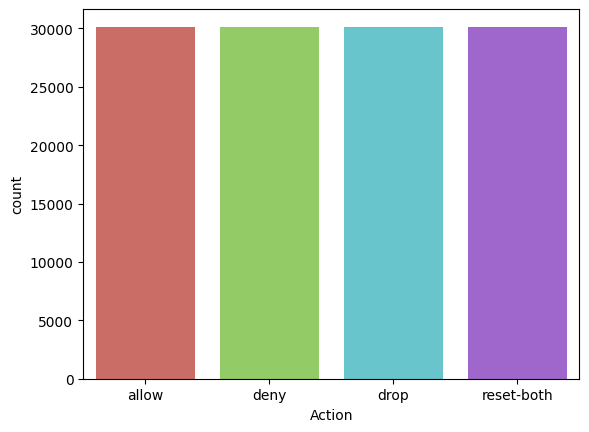

In [6]:
# split x after normalized - for KNN usage
X_train, X_test, y_train, y_test = train_test_split(x_normal, y_resampled,train_size=0.8, test_size=0.2, random_state=42)
sns.countplot(x=y_train,data=df,palette='hls')
plt.show()

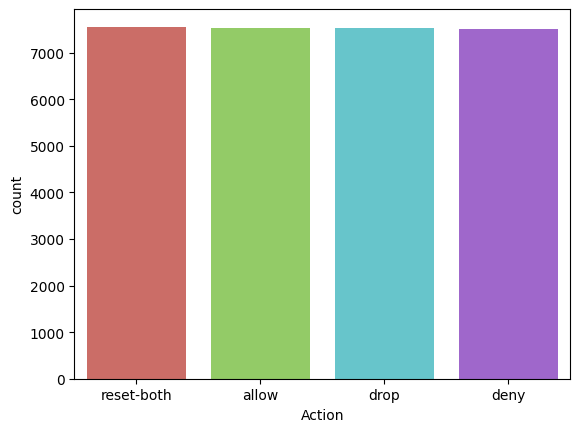

In [7]:
sns.countplot(x=y_test,data=df,palette='hls')
plt.show()

## EDA - data for trees

In [8]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100), max_features=4)
sel.fit(X_resampled, y_resampled)
sel.get_support()
selected_feat= X_resampled.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)
 
X_tree = X_resampled.loc[:,selected_feat]
X_tree
 
X_trainTree, X_testTree, y_trainTree, y_testTree = train_test_split(X_tree, y_resampled,train_size=0.8, test_size=0.2, random_state=42)

4
Index(['Destination Port', 'Bytes', 'Bytes Sent', 'Elapsed Time (sec)'], dtype='object')


# Decision Tree Clasification

In [9]:
# 1) Decision Tree Classification using all 'Default' parameters (gini, best splitter, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier                             
classifier_initial = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
classifier_initial.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier()

In [10]:
y_predicted_initial = classifier_initial.predict(X_testTree) 

In [11]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Gini:", metrics.accuracy_score(y_testTree, y_predicted_initial))

Accuracy Gini: 0.9885427736450585


In [12]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_initial})  
data_p

Actual   Predicted
141903  reset-both  reset-both
33504        allow       allow
11910        allow        deny
103358        drop        drop
140620  reset-both  reset-both
...            ...         ...
59307        allow       allow
27169        allow       allow
138215  reset-both  reset-both
964           drop        drop
47744        allow       allow

[30112 rows x 2 columns]

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_initial))  
print(classification_report(y_testTree, y_predicted_initial)) 

[[7523    3    0    0]
 [   1 7317   17  168]
 [   0    0 7528    0]
 [   0  156    0 7399]]
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7526
        deny       0.98      0.98      0.98      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.98      0.98      0.98      7555

    accuracy                           0.99     30112
   macro avg       0.99      0.99      0.99     30112
weighted avg       0.99      0.99      0.99     30112



In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_initial, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross validation scores: [0.98709008 0.98816936 0.98908261 0.98866703 0.98816887]
Average cross-validation score: 0.9882355901693666


In [15]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_initial, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['allow','deny','drop','reset-both'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.324339 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.324339 to fit



In [16]:
# Use Grid Search for tuning hyperparameters

from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [17]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4, 5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"]
}

In [18]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [19]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [20]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.339857      0.015361         0.051389        0.003006   
1       0.322349      0.020191         0.048308        0.001710   
2       0.340792      0.019185         0.055010        0.007770   
3       0.310942      0.008905         0.051843        0.005808   
4       0.341971      0.012428         0.056918        0.008436   

  param_criterion param_max_depth param_min_samples_leaf param_splitter  \
0            gini               2                      5           best   
1            gini               2                      5         random   
2            gini               2                     10           best   
3            gini               2                     10         random   
4            gini               2                     20           best   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.489166   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.250228   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.489166   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.250228   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.489166   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.490494           0.491034           0.492258           0.490722   
1           0.250187           0.250187           0.250197           0.250654   
2           0.490494           0.491034           0.492258           0.490722   
3           0.250187           0.250187           0.250197           0.250654   
4           0.490494           0.491034           0.492258           0.490722   

   mean_test_score  std_test_score  rank_test_score  
0         0.490735        0.000993               91  
1         0.250291        0.000182              142  
2         0.490735        0.000993               91  
3         0.250291        0.000182              142  
4         0.490735        0.000993               91

In [21]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
120       0.388295      0.035081         0.053637        0.000959   
130       0.383065      0.022014         0.055890        0.005576   
190       0.674299      0.094367         0.091283        0.034171   
200       0.663615      0.113095         0.108408        0.024320   
40        0.389822      0.035078         0.053894        0.001602   

    param_criterion param_max_depth param_min_samples_leaf param_splitter  \
120         entropy              15                      5           best   
130         entropy              20                      5           best   
190        log_loss              15                      5           best   
200        log_loss              20                      5           best   
40             gini              10                      5           best   

                                                params  split0_test_score  \
120  {'criterion': 'entropy', 'max_depth': 15, 'min...           0.545953   
130  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.545953   
190  {'criterion': 'log_loss', 'max_depth': 15, 'mi...           0.545953   
200  {'criterion': 'log_loss', 'max_depth': 20, 'mi...           0.545953   
40   {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.546036   

     split1_test_score  split2_test_score  split3_test_score  \
120           0.545621           0.546409           0.550998   
130           0.545621           0.546409           0.550998   
190           0.545621           0.546409           0.550998   
200           0.545621           0.546409           0.550998   
40            0.545579           0.546492           0.550915   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
120           0.548259         0.547448        0.001996                1  
130           0.548259         0.547448        0.001996                1  
190           0.548259         0.547448        0.001996                1  
200           0.548259         0.547448        0.001996                1  
40            0.548176         0.547440        0.001947                5

In [22]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       random_state=42)

In [23]:
# 2) Decision Tree Classification using gini, splitter = best, max_depth = 10, min_samples_leaf = 5, ccp_alpha = 0.0175

from sklearn.tree import DecisionTreeClassifier                             
classifier_final = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 10, min_samples_split=2, min_samples_leaf= 5, ccp_alpha=0.0175)
classifier_final.fit(X_trainTree, y_trainTree)   

DecisionTreeClassifier(ccp_alpha=0.0175, max_depth=10, min_samples_leaf=5)

In [24]:
y_predicted_final = classifier_final.predict(X_testTree) 

In [25]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy after tuning hyperparameters:", metrics.accuracy_score(y_testTree, y_predicted_final))

Accuracy after tuning hyperparameters: 0.9106668437832094


In [26]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_final})  
data_p

Actual   Predicted
141903  reset-both  reset-both
33504        allow       allow
11910        allow        deny
103358        drop        drop
140620  reset-both  reset-both
...            ...         ...
59307        allow       allow
27169        allow       allow
138215  reset-both  reset-both
964           drop        drop
47744        allow       allow

[30112 rows x 2 columns]

In [27]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_final))  
print(classification_report(y_testTree, y_predicted_final)) 

[[7430   96    0    0]
 [   0 5872   17 1614]
 [   0    0 7528    0]
 [   0  963    0 6592]]
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7526
        deny       0.85      0.78      0.81      7503
        drop       1.00      1.00      1.00      7528
  reset-both       0.80      0.87      0.84      7555

    accuracy                           0.91     30112
   macro avg       0.91      0.91      0.91     30112
weighted avg       0.91      0.91      0.91     30112



In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_final, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross validation scores: [0.91141553 0.93383147 0.91220423 0.91274025 0.91116277]
Average cross-validation score: 0.9162708501704131


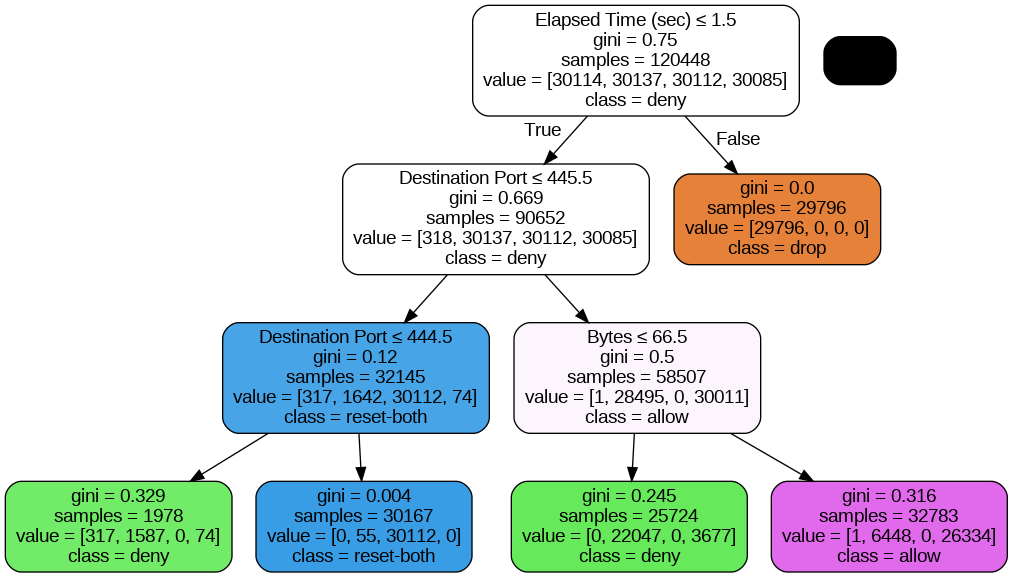

In [29]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_final, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['drop','deny','reset-both','allow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile_Gini.png')
Image(graph.create_png())